In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import tqdm

In [2]:
A = np.genfromtxt("blurred_img_psf.csv", delimiter=',')
img = A[0:255,0:255]
psf = A[0:255,256:511]

In [8]:
def RLconv(img, PSF, iters):
    temp_img = img+0j
    OTF = np.fft.fft2(np.fft.ifftshift(PSF))
    for i in tqdm.tqdm(range(iters)):
        ffn = np.fft.fft2(temp_img)
        Hfn = OTF*ffn
        iHfn = np.fft.ifft2(Hfn)
        ratio = img/iHfn
        iratio = np.fft.fft2(ratio)
        res = OTF*iratio
        ires = np.fft.ifft2(res)
        temp_img *= ires
    return abs(temp_img)
# function result = RL_deconv(image, PSF, iterations)
# fn = image; % at the first iteration
# % OTF = psf2otf(PSF,size(image));
# OTF = fft2(ifftshift(PSF));
# for i=1:iterations
#     ffn = fft2(fn); 
#     Hfn = OTF.*ffn; 
#     iHfn = ifft2(Hfn); 
#     ratio = image./iHfn; 
#     iratio = fft2(ratio); 
#     res = OTF .* iratio; 
#     ires = ifft2(res); 
#     fn = ires.*fn; 
# end
# result = abs(fn); 
# end

In [37]:
def RLconv2(img, PSF, iters):
    temp_img = img+0j
#     OTF = np.fft.fft2(np.fft.ifftshift(PSF))
    OTF = iratio = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(PSF)))
    for i in tqdm.tqdm(range(iters)):
#         ffn = np.fft.fft2(temp_img)
        ffn = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(temp_img)))
        Hfn = OTF*ffn
#         iHfn = np.fft.ifft2(Hfn)
        iHfn = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(Hfn)))
        ratio = img/iHfn
#         iratio = np.fft.fft2(ratio)
        iratio = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(ratio)))
        res = OTF*iratio
#         ires = np.fft.ifft2(res)
        ires = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(res)))
        temp_img *= ires
    return abs(temp_img)

In [56]:
def RLconv3(img, PSF, iters):
    temp_img = img+0j
    F_PSF = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(PSF)))
    F_PSF_hat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(PSF[::-1,::-1])))
    for i in tqdm.tqdm(range(iters)):
        F_denm = F_PSF*np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(temp_img)))
        A = img/np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(F_denm)))
        F_B = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(A)))*F_PSF_hat
        B = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(F_B)))
        temp_img *= B
    return np.abs(temp_img)

In [59]:
img_new = RLconv3(img, psf, 50)
# img_new1 = RLconv2(img,psf, 500)

100%|█████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 110.34it/s]


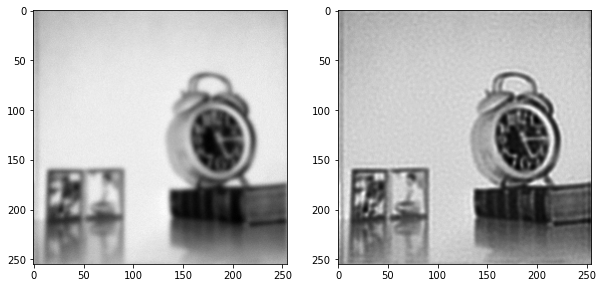

In [61]:
im, ax = plt.subplots(1, 2, figsize= (10,50))
ax[0].imshow(img, cmap='gray')
# ax[0].set_title(’Original Image’)
ax[1].imshow(img_new, cmap='gray')
# ax[1].set_title(’Iterated Image’)